## Pair Programming Intro Regresión Lineal

In [36]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [37]:
df = pd.read_csv('../Datos/vinos_norm_estandar.csv', index_col = 0)
df.head(2)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino,mntwines_sin_cero,mnt_wines_box
0,5524,1957,Graduation,Single,0.235696,0,0,04-09-2012,0.307039,635,...,1.476500,0.843207,0.349414,1.409304,2.51089,-0.550785,0.693904,2.011116,635.0,14.026740
1,2174,1954,Graduation,Single,-0.235454,1,1,08-03-2014,-0.383664,11,...,-0.631503,-0.729006,-0.168236,-1.110409,-0.56872,-1.166125,-0.130463,-0.845274,11.0,3.141178


Ajustamos nuestras columnas categóricas asignándoles una categoría

In [38]:
df['education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: education, dtype: int64

In [39]:
df['education']=df['education'].map({'Graduation': 1, 'PhD': 2, 'Master': 3, '2n Cycle':4, 'Basic': 5})

In [40]:
df['marital_status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Unknown       4
Alone         3
Name: marital_status, dtype: int64

In [41]:
df['marital_status']=df['marital_status'].map({'Married': 1, 'Together': 2, 'Single': 3, 'Divorced':4, 'Widow': 5, 'Unknown': 6, 'Alone':7 })

In [42]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino,mntwines_sin_cero,mnt_wines_box
0,5524,1957,1,3,0.235696,0,0,04-09-2012,0.307039,635,...,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,2.011116,635.0,14.026740
1,2174,1954,1,3,-0.235454,1,1,08-03-2014,-0.383664,11,...,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.845274,11.0,3.141178
2,4141,1965,1,2,0.773999,0,0,21-08-2013,-0.798086,426,...,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0.142339,426.0,12.485975
3,6182,1984,1,2,-1.022355,1,0,10-02-2014,-0.798086,11,...,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.768394,11.0,3.141178
4,5324,1981,2,1,0.241888,1,0,19-01-2014,1.550305,173,...,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.156310,173.0,9.459458


El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:
* Deberéis separar la X y la y.
* Deberéis crear el train y el test.
* Ajustar vuestro modelo.

Separamos los datos de la x y la y

In [43]:
X = df.drop(["mnt_wines_box", 'mntwines_sin_cero', 'dt_customer'], axis = 1)
y = df["mnt_wines_box"]

In [44]:
#comprobamos x

X.head(2)

,id,year_birth,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino
0,5524,1957,1,3,0.235696,0,0,0.307039,635,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.51089,-0.550785,0.693904,2.011116
1,2174,1954,1,3,-0.235454,1,1,-0.383664,11,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.56872,-1.166125,-0.130463,-0.845274


In [45]:
#comprobamos y
y.head(2)

0    14.026740
1     3.141178
Name: mnt_wines_box, dtype: float64

Dividimos nuestro modelo en train y test.

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Iniciamos la regresión lineal.

In [47]:
lr = LinearRegression(n_jobs=-1)

Ajustamos el modelo.

In [48]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

Hacemos las predicciones.

In [49]:
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test) 

In [50]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
792,1.616108,4.571412,Train
1271,12.433631,12.766556,Train
1538,15.948894,15.725367,Train
668,4.727528,3.303269,Train
1975,3.796126,10.533966,Train


In [51]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
792,1.616108,4.571412,Train,-2.955304
1271,12.433631,12.766556,Train,-0.332924
1538,15.948894,15.725367,Train,0.223527
668,4.727528,3.303269,Train,1.424259
1975,3.796126,10.533966,Train,-6.737841


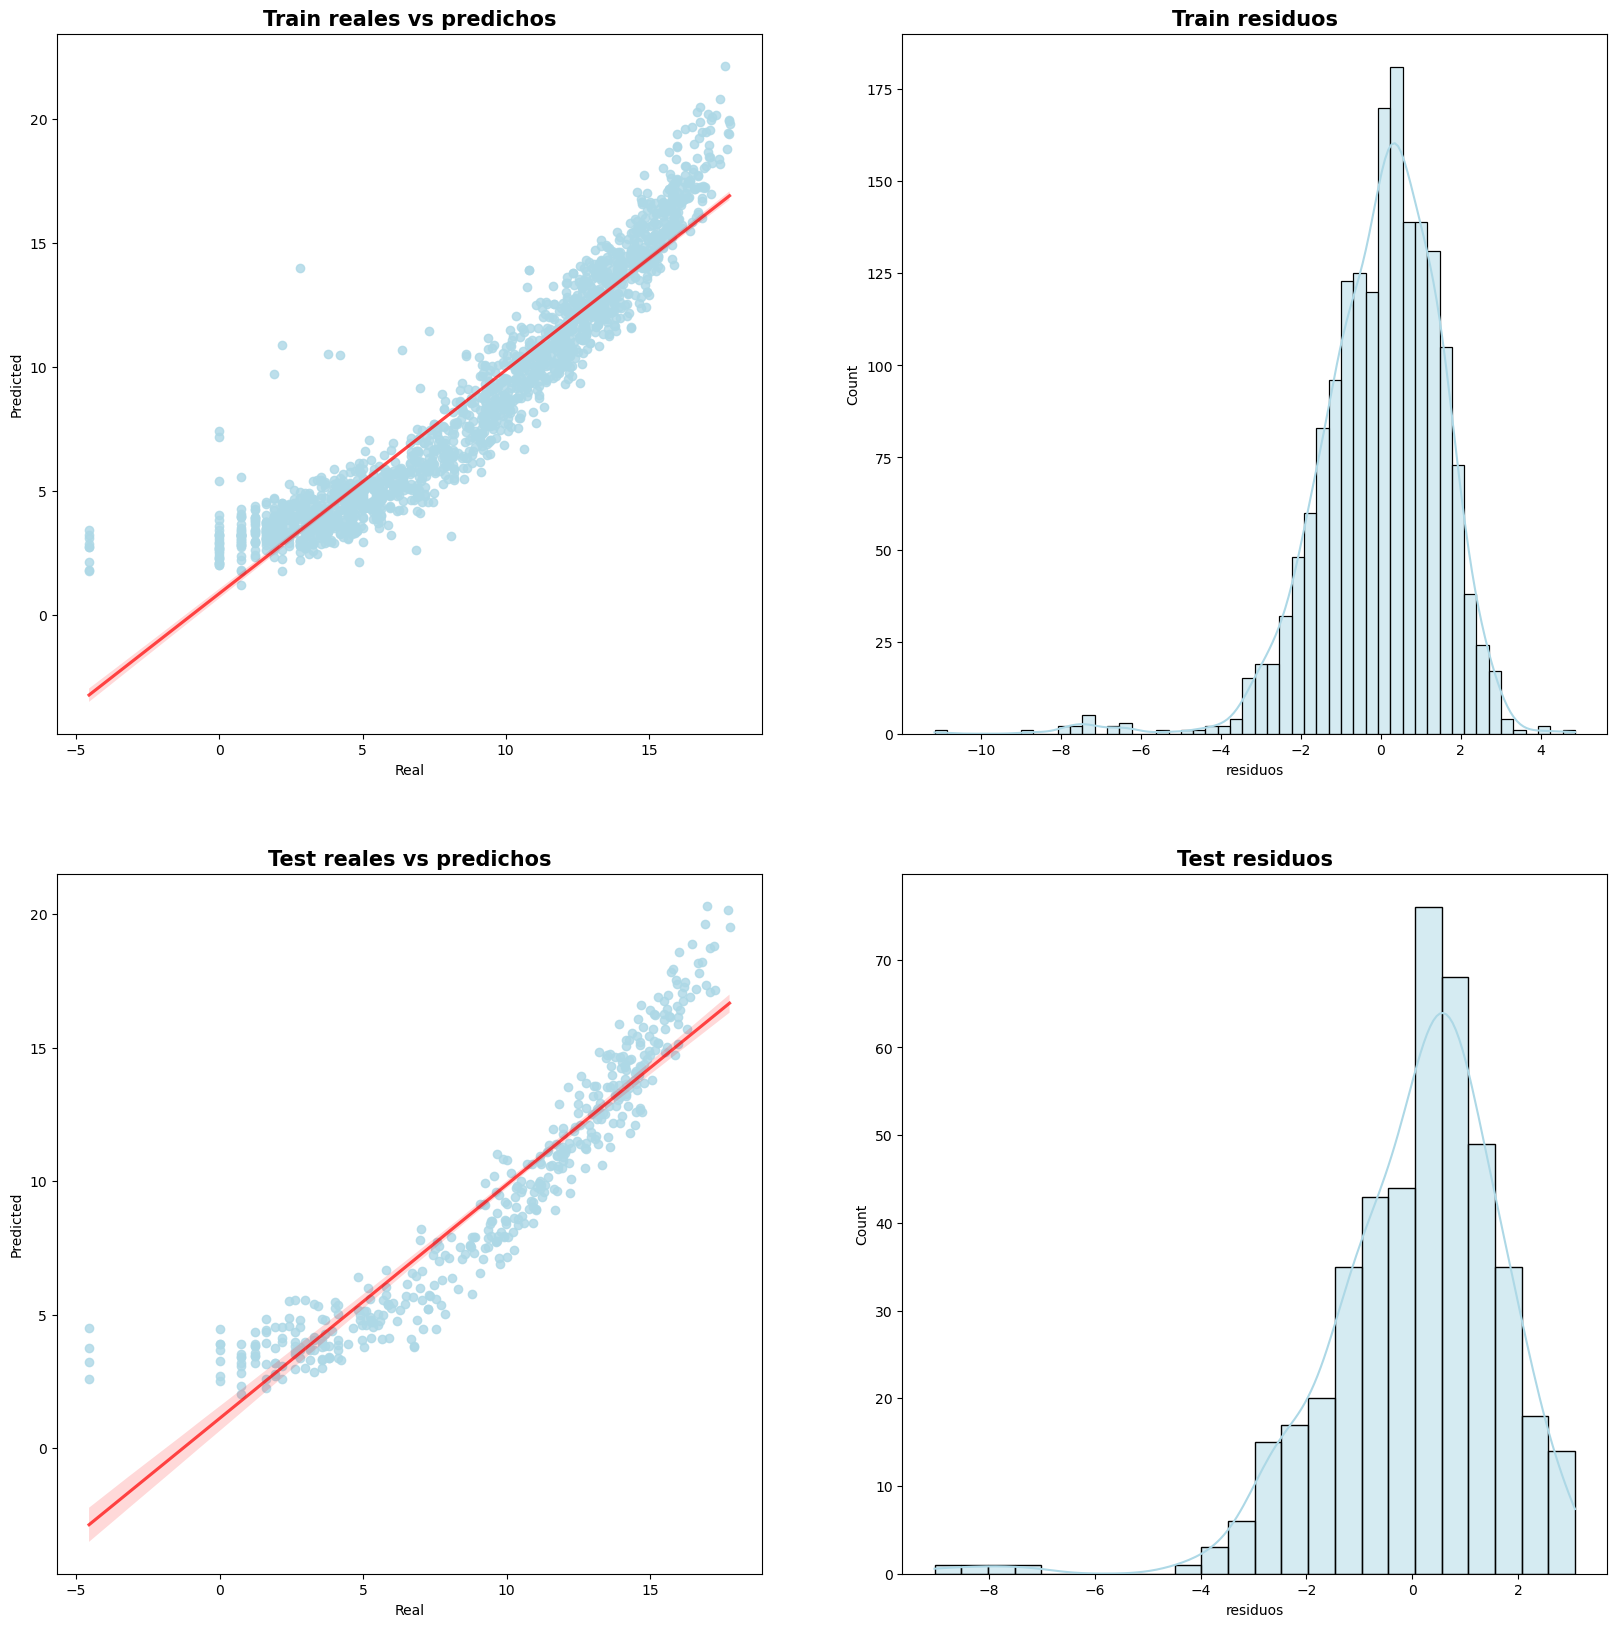

In [53]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "lightblue",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "lightblue",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="lightblue",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "lightblue",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");